In [1]:
import pickle


import matplotlib as mpl

import matplotlib.pyplot as plt


%matplotlib notebook

import numpy as np

In [2]:
with open('Cine Pickles/patient_numbers.pickle', 'rb') as handle:
    pat_nums = pickle.load(handle)
    
with open('Cine Pickles/pat_num_2_frac_nums.pickle', 'rb') as handle:
    pat_num_2_frac_nums = pickle.load(handle)

In [3]:
print(pat_nums)

print(pat_num_2_frac_nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
{1: 5, 2: 4, 3: 5, 4: 8, 5: 5, 6: 4, 7: 5, 8: 5, 9: 5, 10: 5, 12: 5}


#### Load in centroid and boundary variation data

In [6]:
with open('Cine Pickles/boundary_variation_data_(mean).pickle', 'rb') as handle:
    mean_boundary_variation_data = pickle.load(handle)
    
with open('Cine Pickles/centroid_projection_data.pickle', 'rb') as handle:
    centroid_projection_data = pickle.load(handle)
    

#### Total duration in breath hold


In [8]:
patient_numbers = []

patient_fraction_dicts = []

for pat_num in pat_nums:
    print(pat_num)
    
    patient_numbers.append(pat_num)
    
    
    
    fraction_numbers = []
    
    #fractions_duration_dicts = []
    
    durations = []


    for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):
        
        fraction_numbers.append(frac_num)


        cine_video_name = 'pat_' + str(pat_num) + '_frac_' + str(frac_num) + '.ogv'

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_durations.pickle', 'rb') as handle:
            long_breath_hold_durations = pickle.load(handle)

        total_time = int( np.round( sum(long_breath_hold_durations) , 0) )
        
        durations.append(total_time)
        
    fractions_duration_dicts = dict( zip( fraction_numbers , durations) )
    
    patient_fraction_dicts.append(fractions_duration_dicts)
    

patient_duration_dicts  = dict( zip(patient_numbers , patient_fraction_dicts) )

1
2
3
4
5
6
7
8
9
10
12


In [9]:
total_breath_hold_duration = 0

for pat_num in pat_nums:
    
    for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):
        
        total_breath_hold_duration += patient_duration_dicts[pat_num][frac_num]
        
        
print( str( np.floor( total_breath_hold_duration/3600 )) + ' hours, ' + str( round((total_breath_hold_duration%3600)/60 , 0) ) + ' minutes' )   
    

6.0 hours, 18.0 minutes


In [10]:
print(patient_duration_dicts)

{1: {1: 272, 2: 478, 3: 260, 4: 284, 5: 264}, 2: {1: 344, 2: 306, 3: 194, 4: 442}, 3: {1: 350, 2: 366, 3: 351, 4: 345, 5: 301}, 4: {1: 277, 2: 124, 3: 628, 4: 176, 5: 367, 6: 190, 7: 96, 8: 302}, 5: {1: 411, 2: 414, 3: 439, 4: 455, 5: 421}, 6: {1: 758, 2: 490, 3: 522, 4: 529}, 7: {1: 551, 2: 566, 3: 615, 4: 602, 5: 661}, 8: {1: 503, 2: 525, 3: 520, 4: 464, 5: 497}, 9: {1: 394, 2: 292, 3: 361, 4: 394, 5: 450}, 10: {1: 322, 2: 342, 3: 309, 4: 295, 5: 303}, 12: {1: 515, 2: 430, 3: 538, 4: 548, 5: 546}}


#### Set angle

#### Unravel centroid data


In [13]:
centroid_within_1_5_unravelled = []

centroid_within_3_unravelled = []

centroid_within_4_5_unravelled = []


for angle in [0, 1/4 , 1/2, 3/4]:
    


    within_1_5_unravelled = []

    within_3_unravelled = []

    within_4_5_unravelled = []


    for pat_num in pat_nums:

        for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):


                percentage_1_5 = centroid_projection_data[pat_num][frac_num][angle][0]

                percentage_3 = centroid_projection_data[pat_num][frac_num][angle][1]

                percentage_4_5 = centroid_projection_data[pat_num][frac_num][angle][2]

                #print(percentage)
                
                for i in range(0, patient_duration_dicts[pat_num][frac_num]):

                    within_1_5_unravelled.append( percentage_1_5)

                    within_3_unravelled.append( percentage_3)

                    within_4_5_unravelled.append( percentage_4_5)


    centroid_within_1_5_unravelled.append( np.array(within_1_5_unravelled) )

    centroid_within_3_unravelled.append( np.array(within_3_unravelled) )

    centroid_within_4_5_unravelled.append( np.array(within_4_5_unravelled) )

#### Unravel boundary variation data 

In [14]:
boundary_within_1_5_unravelled = []

boundary_within_3_unravelled = []

boundary_within_4_5_unravelled = []


for angle in [0, 1/4 , 1/2 , 3/4]:
    
    within_1_5_unravelled = []

    within_3_unravelled = []

    within_4_5_unravelled = []


    for pat_num in pat_nums:

        for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):


            percentage_1_5 = mean_boundary_variation_data[pat_num][frac_num][angle][0]

            percentage_3 = mean_boundary_variation_data[pat_num][frac_num][angle][1]

            percentage_4_5 = mean_boundary_variation_data[pat_num][frac_num][angle][2]

            #print(percentage)
            
            for i in range(0, patient_duration_dicts[pat_num][frac_num]):

                within_1_5_unravelled.append( percentage_1_5)

                within_3_unravelled.append( percentage_3)

                within_4_5_unravelled.append( percentage_4_5)


    boundary_within_1_5_unravelled.append( np.array(within_1_5_unravelled) )

    boundary_within_3_unravelled.append( np.array(within_3_unravelled) )

    boundary_within_4_5_unravelled.append( np.array(within_4_5_unravelled) )


In [15]:
# boundary_within_3_unravelled = np.array(boundary_within_3_unravelled)

# boundary_within_1_5_unravelled = np.array(boundary_within_1_5_unravelled)

# #print(boundary_within_3_unravelled)

# mins_within_3 = []

# mins_within_1_5 = []

# min_angles = []

# for i in range(0, len(boundary_within_3_unravelled[0])):
    
#     mins_within_3.append(  np.min(boundary_within_3_unravelled[:,i])     )
    
#     mins_within_1_5.append(  np.min(boundary_within_1_5_unravelled[:,i])     )
    
# #     angle = np.where(boundary_within_3_unravelled[:,i] == np.min(boundary_within_3_unravelled[:,i]))[0][0]
    
# #     min_angles.append(angle)

# mins_within_3 = np.array(mins_within_3)

# mins_within_1_5 = np.array(mins_within_1_5)
   
    
# print(np.percentile(mins_within_1_5, 95))

# print(np.mean(mins_within_1_5))

In [16]:
# adapt_gating = boundary_within_3_unravelled

# #print(adapt_gating[2])

# #print(adapt_gating.shape)

# #adapt_gating[1] = boundary_within_1_5_unravelled[1]

# adapt_gating[2] = boundary_within_1_5_unravelled[2]

# #print(adapt_gating[2])



# adapted_mins = []


# min_angles = []


# for i in range(0, len(boundary_within_3_unravelled[0])):
    
#     adapted_mins.append(  np.min(adapt_gating[:,i])     )
    
    
#     angle = np.where(boundary_within_3_unravelled[:,i] == np.min(boundary_within_3_unravelled[:,i]))[0][0]
    
#     min_angles.append(angle)

# print(np.percentile(adapted_mins, 95))

# print(np.percentile(adapted_mins, 5))

# print(np.mean(adapted_mins))


# print(np.mean(mins_within_3/(adapted_mins)))

# print(np.std(mins_within_3/(adapted_mins)))


In [18]:
# diff_3_To_1_5 = mins_within_3 - mins_within_1_5


# #print(np.percentile(mins_within_3, 50))

# print(np.mean(diff_3_To_1_5))

# print(np.std(diff_3_To_1_5))


# print(np.mean(mins_within_3/(mins_within_1_5)))

# print(np.std(mins_within_3/(mins_within_1_5)))


In [19]:
# boundary_within_1_5_unravelled = []

# boundary_within_3_unravelled = []

# boundary_within_4_5_unravelled = []


# for angle in [0,1/2]:#, 1/4 , 1/2 , 3/4]:
    
#     within_1_5_unravelled = []

#     within_3_unravelled = []

#     within_4_5_unravelled = []


#     for pat_num in pat_nums:

#         for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):


#             percentage_1_5 = mean_boundary_variation_data[pat_num][frac_num][angle][0]

#             percentage_3 = mean_boundary_variation_data[pat_num][frac_num][angle][1]

#             percentage_4_5 = mean_boundary_variation_data[pat_num][frac_num][angle][2]

#             #print(percentage)
            
#             for i in range(0, patient_duration_dicts[pat_num][frac_num]):

#                 within_1_5_unravelled.append( percentage_1_5)

#                 within_3_unravelled.append( percentage_3)

#                 within_4_5_unravelled.append( percentage_4_5)


#     boundary_within_1_5_unravelled.append( np.array(within_1_5_unravelled) )

#     boundary_within_3_unravelled.append( np.array(within_3_unravelled) )

#     boundary_within_4_5_unravelled.append( np.array(within_4_5_unravelled) )




In [20]:
# plt.figure()

# plt.scatter([i for i in range( 0  , len(boundary_within_3_unravelled[0])) ] ,boundary_within_3_unravelled[0] - boundary_within_1_5_unravelled[1])


# print(np.mean(boundary_within_3_unravelled[0] - boundary_within_1_5_unravelled[1]))

# print(np.std(boundary_within_3_unravelled[0] - boundary_within_1_5_unravelled[1]))

In [21]:
# print(np.mean(boundary_within_3_unravelled[0] - boundary_within_1_5_unravelled[1]))
# print(np.std(boundary_within_3_unravelled[0] - boundary_within_1_5_unravelled[1]))

# print(np.mean(boundary_within_3_unravelled[0]/(boundary_within_1_5_unravelled[0])))

# print(np.std(boundary_within_3_unravelled[0]/(boundary_within_1_5_unravelled[0])))


# #[ i for i in range(0, len(boundary_within_3_unravelled[0]))]
# plt.figure()

# plt.scatter( [ i for i in range(0, len(boundary_within_3_unravelled[0]))], boundary_within_3_unravelled/(boundary_within_1_5_unravelled))

In [22]:
# error_indexs = []

# for index in range( 0 , len(boundary_within_1_5_unravelled)):
    
#     if boundary_within_4_5_unravelled[index] > 100:
        
#         error_indexs.append(index)
    
# print(error_indexs)    

#### Generate Box plot - Comparing centroid and boundary

<IPython.core.display.Javascript object>


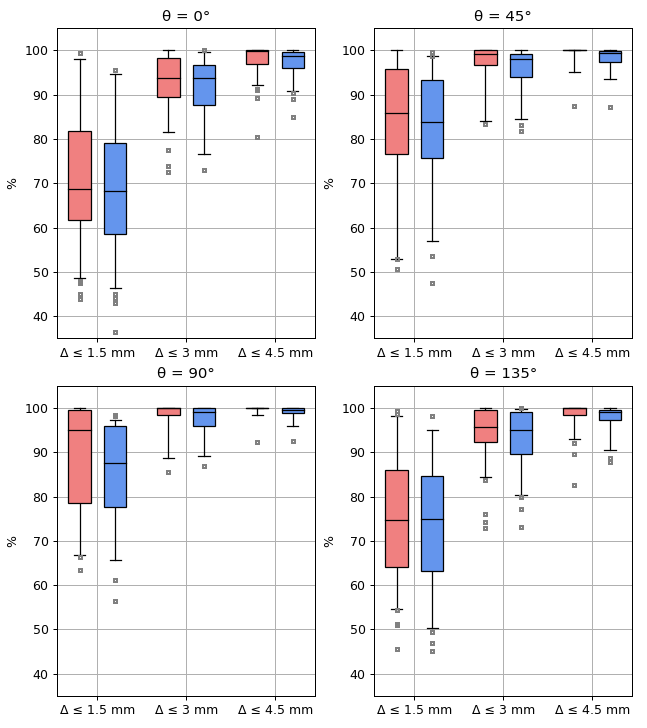

In [23]:
centroid_colour = 'lightcoral'

boundary_colour = 'cornflowerblue'



whiskers = [5,95]

flier_col = 'gray'

fig = plt.figure(figsize = (8,9))

#plt.grid()



########## Theta = 0

ax1 = fig.add_subplot(221)

plt.grid()


bp_centroid_1_5 = ax1.boxplot(centroid_within_1_5_unravelled[0], whis = whiskers ,
                     positions = [1],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )



bp_centroid_3 = ax1.boxplot(centroid_within_3_unravelled[0], whis = whiskers ,
                     positions = [3],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_centroid_4_5 = ax1.boxplot(centroid_within_4_5_unravelled[0], whis = whiskers ,
                     positions = [5],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )




bp_boundary_1_5 = ax1.boxplot(boundary_within_1_5_unravelled[0], whis = whiskers ,
                     positions = [1.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_boundary_3 = ax1.boxplot(boundary_within_3_unravelled[0],
                     whis = whiskers ,
                     widths = 0.5,
                     positions = [3.8],
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

bp_boundary_4_5 = ax1.boxplot(boundary_within_4_5_unravelled[0], whis = whiskers ,
                     positions = [5.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

ax1.set_ylim(35,105)
ax1.set_xticks([1.4, 3.4, 5.4])

ax1.set_xticklabels([' Δ ≤ 1.5 mm ', ' Δ ≤ 3 mm ', ' Δ ≤ 4.5 mm '])

ax1.set_ylabel('%')

ax1.set_title('θ = 0°')



#fig.legend( [ bp_centroid_1_5['boxes'][0] , bp_boundary_1_5['boxes'][0] ] , 
           #[ 'Centroid' , 'Boundary' ] ) 







########## Theta = 1/4

ax2 = fig.add_subplot(222)

plt.grid()


bp_centroid_1_5 = ax2.boxplot(centroid_within_1_5_unravelled[1], whis = whiskers ,
                     positions = [1],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )



bp_centroid_3 = ax2.boxplot(centroid_within_3_unravelled[1], whis = whiskers ,
                     positions = [3],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_centroid_4_5 = ax2.boxplot(centroid_within_4_5_unravelled[1], whis = whiskers ,
                     positions = [5],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )




bp_boundary_1_5 = ax2.boxplot(boundary_within_1_5_unravelled[1], whis = whiskers ,
                     positions = [1.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_boundary_3 = ax2.boxplot(boundary_within_3_unravelled[1],
                     whis = whiskers ,
                     widths = 0.5,
                     positions = [3.8],
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

bp_boundary_4_5 = ax2.boxplot(boundary_within_4_5_unravelled[1], whis = whiskers ,
                     positions = [5.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

ax2.set_ylim(35,105)
ax2.set_xticks([1.4, 3.4, 5.4])

ax2.set_xticklabels([' Δ ≤ 1.5 mm ', ' Δ ≤ 3 mm ', ' Δ ≤ 4.5 mm '])

ax2.set_ylabel('%')

ax2.set_title('θ = 45°')



#fig.legend( [ bp_centroid_1_5['boxes'][0] , bp_boundary_1_5['boxes'][0] ] , [ 'Centroid' , 'Boundary' ] ) 









########## Theta = 1/2

ax3 = fig.add_subplot(223)

plt.grid()


bp_centroid_1_5 = ax3.boxplot(centroid_within_1_5_unravelled[2], whis = whiskers ,
                     positions = [1],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )



bp_centroid_3 = ax3.boxplot(centroid_within_3_unravelled[2], whis = whiskers ,
                     positions = [3],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_centroid_4_5 = ax3.boxplot(centroid_within_4_5_unravelled[2], whis = whiskers ,
                     positions = [5],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )




bp_boundary_1_5 = ax3.boxplot(boundary_within_1_5_unravelled[2], whis = whiskers ,
                     positions = [1.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_boundary_3 = ax3.boxplot(boundary_within_3_unravelled[2],
                     whis = whiskers ,
                     widths = 0.5,
                     positions = [3.8],
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

bp_boundary_4_5 = ax3.boxplot(boundary_within_4_5_unravelled[2], whis = whiskers ,
                     positions = [5.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black', lw = 1),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

ax3.set_ylim(35,105)
ax3.set_xticks([1.4, 3.4, 5.4])

ax3.set_xticklabels([' Δ ≤ 1.5 mm ', ' Δ ≤ 3 mm ', ' Δ ≤ 4.5 mm '])

ax3.set_ylabel('%')

ax3.set_title('θ = 90°')



#fig.legend( [ bp_centroid_1_5['boxes'][0] , bp_boundary_1_5['boxes'][0] ] , [ 'Centroid' , 'Boundary' ] ) 







########## Theta = 3/4

ax4 = fig.add_subplot(224)

plt.grid()


bp_centroid_1_5 = ax4.boxplot(centroid_within_1_5_unravelled[3], whis = whiskers ,
                     positions = [1],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )



bp_centroid_3 = ax4.boxplot(centroid_within_3_unravelled[3], whis = whiskers ,
                     positions = [3],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_centroid_4_5 = ax4.boxplot(centroid_within_4_5_unravelled[3], whis = whiskers ,
                     positions = [5],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )




bp_boundary_1_5 = ax4.boxplot(boundary_within_1_5_unravelled[3], whis = whiskers ,
                     positions = [1.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_boundary_3 = ax4.boxplot(boundary_within_3_unravelled[3],
                     whis = whiskers ,
                     widths = 0.5,
                     positions = [3.8],
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

bp_boundary_4_5 = ax4.boxplot(boundary_within_4_5_unravelled[3], whis = whiskers ,
                     positions = [5.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black', lw = 1),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

ax4.set_ylim(35,105)
ax4.set_xticks([1.4, 3.4, 5.4])

ax4.set_xticklabels([' Δ ≤ 1.5 mm ', ' Δ ≤ 3 mm ', ' Δ ≤ 4.5 mm '])

ax4.set_ylabel('%')


ax4.set_title('θ = 135°')



#fig.legend( [ bp_centroid_1_5['boxes'][0] , bp_boundary_1_5['boxes'][0] ] , [ 'Centroid' , 'Boundary' ] ) 







# fig.legend( [ bp_centroid_1_5['boxes'][0] , bp_boundary_1_5['boxes'][0] ] , [ 'Centroid' , 'Boundary' ] ) 







#plt.legend( bp_centroid_1_5['boxes'] , ['Centroid'] ) 






# bp_centroid = ax.boxplot([ centroid_within_1_5_unravelled , centroid_within_3_unravelled, centroid_within_4_5_unravelled ] , 
# positions = [1, 3, 5],
# patch_artist = 'True', 
# #labels = [ ' Δ = 1.5 mm' , 3, 4.5],
# boxprops=dict(fc='lightblue', color='black'),
# medianprops=dict(color='black'),
# flierprops=dict(color='tab:red', marker = '.', markeredgecolor='tab:red'))


# bp_centroid = ax.boxplot([ boundary_within_1_5_unravelled , boundary_within_3_unravelled, boundary_within_4_5_unravelled ] , 
# positions = [1.8, 3.8 ,5.8],
# patch_artist = 'True' , 
# #labels = [ 1.5, 3, 4.5],
# boxprops=dict(fc='orange', color='black'),
# medianprops=dict(color='black'),
# flierprops=dict(color='tab:red', marker = '.', markeredgecolor='tab:red'))


#ax.set_xticklabels(['A', 'B', 'C'])


# fig.suptitle('Variations of Target during Breath hold', fontsize=16)

# fig.supylabel('Percentage of time during periods of breath hold')

# fig.supxlabel('Δ : Distance of target from median position')

fig.tight_layout()




In [19]:
 
bp_boundary_1_5['whiskers'][0]

<IPython.core.display.Javascript object>


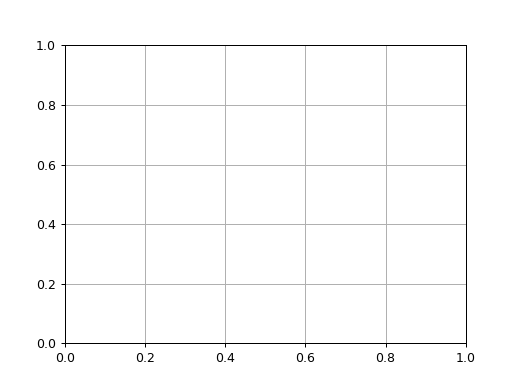

ValueError: List of boxplot statistics and `positions` values must have same the length

In [59]:
fig = plt.figure()

#plt.grid()

ax = fig.add_subplot(111)
plt.grid()


bp_centroid_1_5 = ax.boxplot(boundary_within_1_5_unravelled - centroid_within_1_5_unravelled  , whis = [0,100] ,
                     positions = [1],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc='skyblue', color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color='tab:red', marker = '.', markeredgecolor='tab:red') 
                    )


ax.set_xlim(0.6, 1.4)


<IPython.core.display.Javascript object>


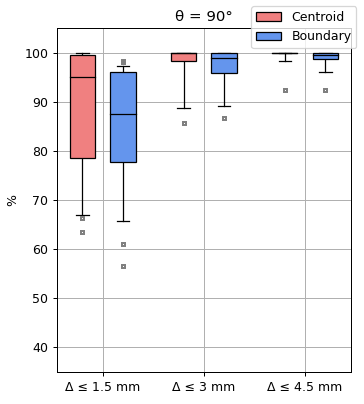

In [35]:
centroid_colour = 'lightcoral'

boundary_colour = 'cornflowerblue'

i = 2



whiskers = [5,95]

flier_col = 'gray'

fig = plt.figure(figsize = (4.5,5))

#plt.grid()



########## Theta = 0

ax1 = fig.add_subplot(111)

plt.grid()


bp_centroid_1_5 = ax1.boxplot(centroid_within_1_5_unravelled[i], whis = whiskers ,
                     positions = [1],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )



bp_centroid_3 = ax1.boxplot(centroid_within_3_unravelled[i], whis = whiskers ,
                     positions = [3],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_centroid_4_5 = ax1.boxplot(centroid_within_4_5_unravelled[i], whis = whiskers ,
                     positions = [5],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=centroid_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )




bp_boundary_1_5 = ax1.boxplot(boundary_within_1_5_unravelled[i], whis = whiskers ,
                     positions = [1.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )


bp_boundary_3 = ax1.boxplot(boundary_within_3_unravelled[i],
                     whis = whiskers ,
                     widths = 0.5,
                     positions = [3.8],
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

bp_boundary_4_5 = ax1.boxplot(boundary_within_4_5_unravelled[i], whis = whiskers ,
                     positions = [5.8],
                     widths = 0.5,
                     patch_artist = 'True',
                     boxprops=dict(fc=boundary_colour, color='black'),
                     medianprops=dict(color='black'),
                     flierprops=dict(color=flier_col, marker = '.', markeredgecolor=flier_col) 
                    )

ax1.set_ylim(35,105)
ax1.set_xticks([1.4, 3.4, 5.4])

ax1.set_xticklabels([' Δ ≤ 1.5 mm ', ' Δ ≤ 3 mm ', ' Δ ≤ 4.5 mm '])

ax1.set_ylabel('%')

ax1.set_title('θ = 90°')

fig.tight_layout()



fig.legend( [ bp_centroid_1_5['boxes'][0] , bp_boundary_1_5['boxes'][0] ] , 
           [ 'Centroid' , 'Boundary' ] ) 
